In [5]:
library(tidyverse)
library(dplyr)

In [31]:
# reading in the data 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/bak" 
heart_data = read_csv(url, col_names = c("age", "sex", "chest_pain_type", "resting_heartbeat", "chol", "fbs", "resting_ecg_results", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "heart_disease_severity")) %>% 
    select(age, sex, resting_heartbeat, chest_pain_type, resting_ecg_results, heart_disease_severity) %>% 
    mutate(heart_disease_severity = as_factor(heart_disease_severity))

# using training data, summarize data into one tbl 
    # which rows have missing data? 
missing_data = heart_data %>% 
    filter(resting_heartbeat == "?") %>% 
    summarize(rows_with_missing_data = n()) 
missing_data
    # we have 56 rows that have "?" or missing data in the trestbps variable 

# number of observations in each class? we are predicting num, the unknown variable. including rows with missing data, how many observations in each class of heart disease (num) do we have? 
    # 0 means absence of heart disease, with each ascending number, heart disease prognosis worsens 
heart_disease_observations = heart_data %>% 
    group_by(heart_disease_severity) %>% 
    summarize(disease_categories = n()) 
heart_disease_observations

# heart_data is already tidy, clean. we can also remove the ?s because we aren't using them in our analysis 
heart_data_cleaned = heart_data %>% 
    filter(resting_heartbeat != "?") 
heart_data_cleaned

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  chest_pain_type = col_double(),
  resting_heartbeat = col_character(),
  chol = col_character(),
  fbs = col_character(),
  resting_ecg_results = col_double(),
  thalach = col_character(),
  exang = col_character(),
  oldpeak = col_character(),
  slope = col_character(),
  ca = col_character(),
  thal = col_character(),
  heart_disease_severity = col_double()
)



rows_with_missing_data
<int>
56


`summarise()` ungrouping output (override with `.groups` argument)



heart_disease_severity,disease_categories
<fct>,<int>
0,51
1,56
2,41
3,42
4,10


age,sex,resting_heartbeat,chest_pain_type,resting_ecg_results,heart_disease_severity
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
63,1,140,4,1,2
44,1,130,4,1,0
60,1,132,4,1,2
55,1,142,4,1,1
66,1,110,3,2,0
66,1,120,3,1,0
65,1,150,4,1,3
60,1,180,3,1,0
60,1,120,3,0,3


age,sex,resting_heartbeat,chest_pain_type,resting_ecg_results,heart_disease_severity
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
63,1,140,4,1,2
44,1,130,4,1,0
60,1,132,4,1,2
55,1,142,4,1,1
66,1,110,3,2,0
66,1,120,3,1,0


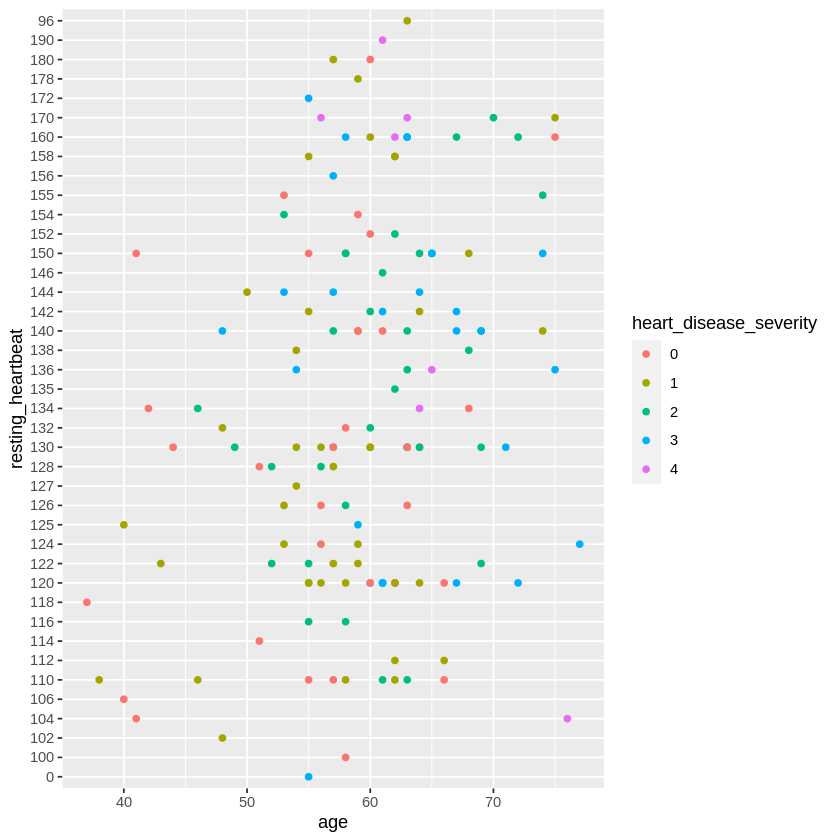

In [28]:
# ggplot exploring relationship between resting heartbeat levels and age, color-coded by the heart disease severity
# facet grid, based on num, scatterplot with x = the age, y = count of number of people in this num category at this specific age 
head(heart_data_cleaned)
heart_data_ggplot = heart_data_cleaned %>% 
    ggplot(aes(x = age,  y = resting_heartbeat, color = heart_disease_severity)) + 
        geom_point()
heart_data_ggplot

age,sex,resting_heartbeat,chest_pain_type,resting_ecg_results,heart_disease_severity
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
63,1,140,4,1,2
44,1,130,4,1,0
60,1,132,4,1,2
55,1,142,4,1,1
66,1,110,3,2,0
66,1,120,3,1,0


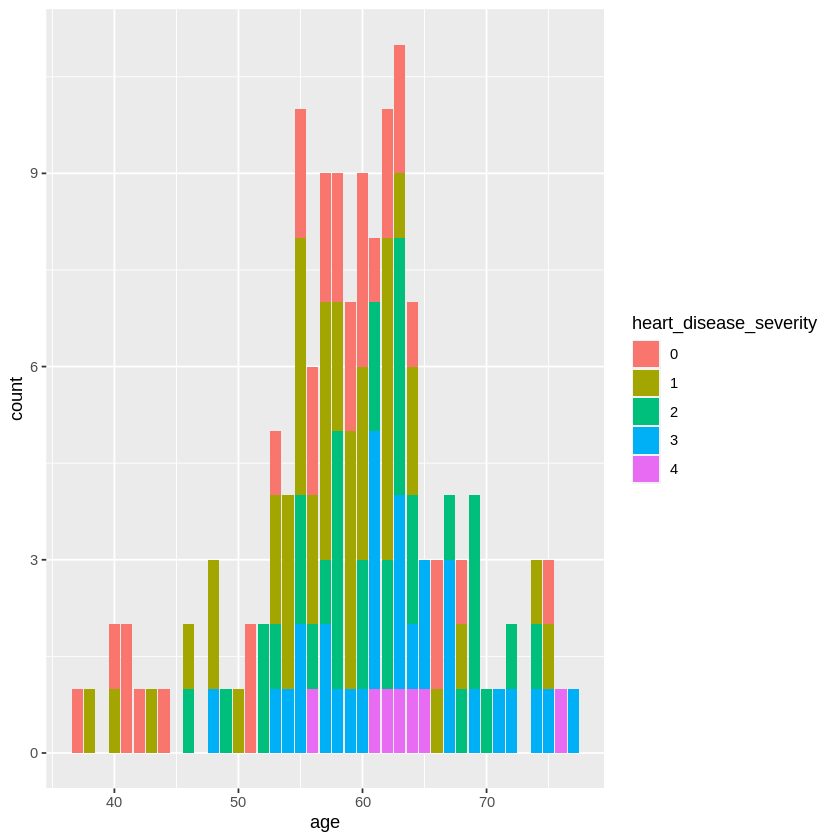

In [30]:
# this is the code for an overlapping bar plot 
head(heart_data_cleaned)
heart_data_ggplot = heart_data_cleaned %>% 
    ggplot(aes(x = age, fill = heart_disease_severity)) + 
        geom_bar(stat = "count")
heart_data_ggplot

1. get everyone onto the DSCI project 
2. figure out what our thesis is 
3. c+p everything onto jupyter, an hand in the project. 

In [36]:
# add a summary table of the counts of each predictor variable for each level of heart disease severity 

`summarise()` regrouping output by 'age' (override with `.groups` argument)



age,heart_disease_severity,n
<dbl>,<fct>,<int>
37,0,1
38,1,1
40,0,1
40,1,1
41,0,2
42,0,1
43,1,1
44,0,1
46,1,1


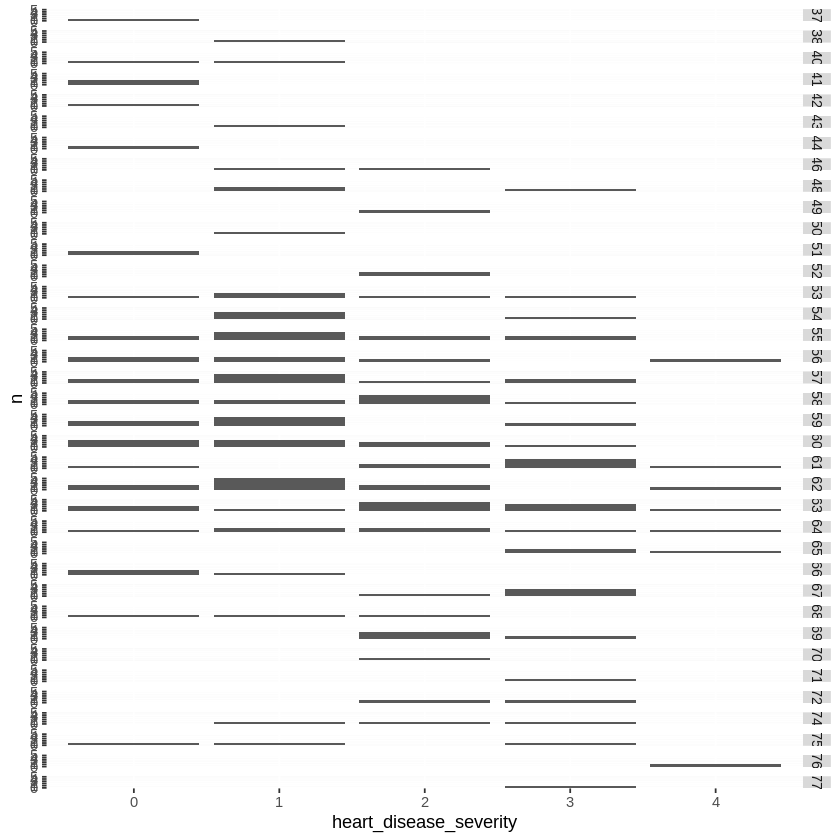

In [64]:
heart_data_cleaned %>% group_by(age, heart_disease_severity) %>% summarize(n = n())

`summarise()` regrouping output by 'sex' (override with `.groups` argument)



sex,heart_disease_severity,n
<dbl>,<fct>,<int>
0,0,2
0,1,3
1,0,30
1,1,40
1,2,33
1,3,29
1,4,7


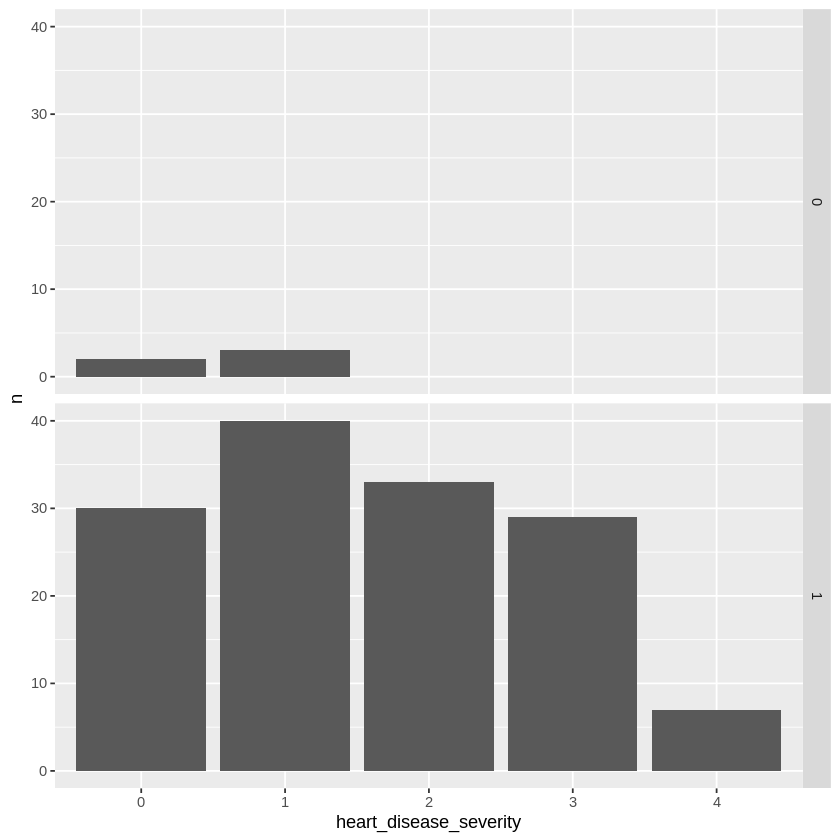

In [62]:
two = heart_data_cleaned %>% group_by(sex, heart_disease_severity) %>% summarize(n = n())
two

plot2 = two %>% 
    ggplot(aes(x = heart_disease_severity, y = n)) + 
        geom_bar(stat = "identity") + 
        facet_grid(sex ~ .)
plot2
# males have a higher occurence of low-risk heart disease at about 1

In [44]:
# heart_data_cleaned %>% group_by(resting_heartbeat, heart_disease_severity) %>% summarize(n())

`summarise()` regrouping output by 'resting_ecg_results' (override with `.groups` argument)



resting_ecg_results,heart_disease_severity,n
<dbl>,<fct>,<int>
0,0,11
0,1,20
0,2,12
0,3,14
0,4,3
1,0,16
1,1,16
1,2,18
1,3,13


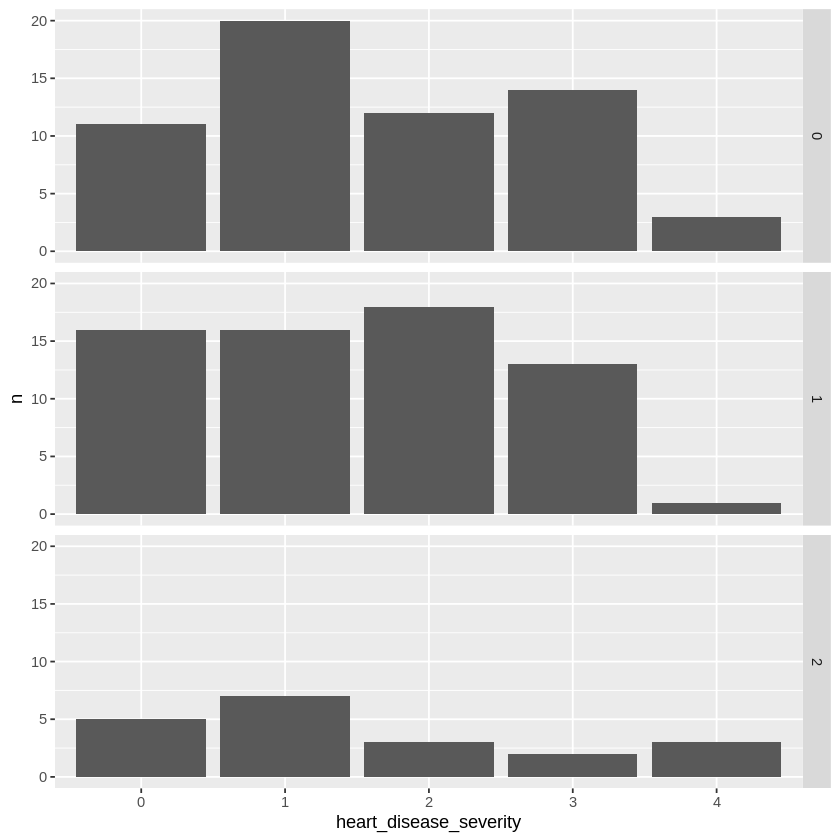

In [55]:
three = heart_data_cleaned %>% group_by(resting_ecg_results, heart_disease_severity) %>% summarize(n = n()) 
three
# in resting ecgs of 0 and 1, there are higher chances of occuring heart disease that are moderate (around 1-2) 
# facet grid, distribution of heart disease severity for each resting ecg result in a bar graph 
plot3 = three %>% 
    ggplot(aes(x = heart_disease_severity, y = n)) + 
        geom_bar(stat = "identity") + 
        facet_grid(resting_ecg_results ~ .)
plot3
# from this plot, we see that at resting ecgs of 0 and 1, there is a high occurence of low to moderate heart disease (1-3)

`summarise()` regrouping output by 'chest_pain_type' (override with `.groups` argument)



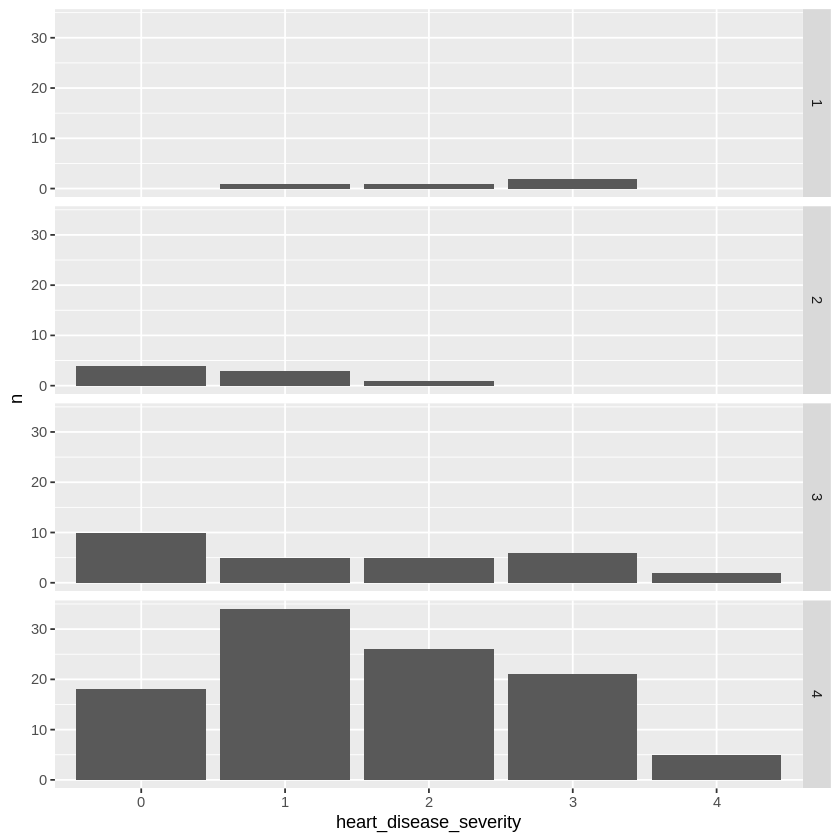

In [58]:
four = heart_data_cleaned %>% group_by(chest_pain_type, heart_disease_severity) %>% summarize(n = n())
plot4 = four %>% 
    ggplot(aes(x = heart_disease_severity, y = n)) + 
        geom_bar(stat = "identity") + 
        facet_grid(chest_pain_type ~ .)
plot4 
# this tells us that at a chest pain type of 4, we see a higher occurence of heart disease severity of 1-3. 

In [ ]:
# goal: use plots to SHOW why we are choosing a certain predictor variable